In [1]:
import pandas as pd
import ast
from nrclex import NRCLex

In [2]:
df=pd.read_csv(r"C:\Users\s.a.singh.bhadauria\Downloads\fgk.csv")


In [3]:
df.head()

,Unnamed: 0,Id,From,To,Date,Subject,Text,Sender_Email_Type,Receiver_Email_Type,tags_removed,...,top_emotions,affect_dict,new_dict,new_top_emotions,emotions1,date_mod,Topics,Tags,Department,Departments
0,0,1,laxmi.saoji@gmail.com,ygayathri95@yahoo.com,2022-03-10,Golf,"Although I've never played this course, I give...",gmail,Yahoo,"Although I've never played this course, I give...",...,"[('trust', 0.2727272727272727)]","{'star': ['anticipation', 'joy', 'positive', '...","{'anticipation': 2, 'joy': 1, 'trust': 3, 'fea...",['trust'],trust,02/20/22,course golf play The played courses greens hol...,Golf,Active Life,Active Life
1,1,2,laxmi.saoji@gmail.com,ygayathri95@yahoo.com,2022-03-10,Golf,Easily the worse course I have played in Phoen...,gmail,Yahoo,Easily the worse course I have played in Phoen...,...,"[('positive', 0.22727272727272727)]","{'bad': ['anger', 'disgust', 'fear', 'negative...","{'anger': 2, 'disgust': 2, 'fear': 3, 'sadness...",['fear'],negative,02/15/22,course golf play The played courses greens hol...,Golf,Active Life,Active Life
2,2,3,laxmi.saoji@gmail.com,ygayathri95@yahoo.com,2022-03-10,Golf,Played here on a Friday afternoon. The people ...,gmail,Yahoo,Played here on a Friday afternoon. The people ...,...,"[('positive', 0.20454545454545456)]","{'green': ['joy', 'positive', 'trust'], 'fee':...","{'joy': 5, 'trust': 5, 'anger': 3, 'anticipati...","['joy', 'trust']",negative,02/19/22,course golf play The played courses greens hol...,Golf,Active Life,Active Life
3,3,4,laxmi.saoji@gmail.com,ygayathri95@yahoo.com,2022-03-10,Golf,Golf course is my favorite in the east valley....,gmail,Yahoo,Golf course is my favorite in the east valley....,...,"[('positive', 0.1702127659574468)]","{'favorite': ['joy', 'positive', 'trust'], 'de...","{'joy': 5, 'trust': 6, 'anticipation': 6, 'sur...","['trust', 'anticipation']",negative,02/15/22,course golf play The played courses greens hol...,Golf,Active Life,Active Life
4,4,5,laxmi.saoji@gmail.com,ygayathri95@yahoo.com,2022-03-10,Golf,I went out last saturday and had an good exper...,gmail,Yahoo,I went out last saturday and had an good exper...,...,"[('positive', 0.25)]","{'good': ['anticipation', 'joy', 'positive', '...","{'anticipation': 1, 'joy': 2, 'surprise': 2, '...","['joy', 'surprise', 'trust']",negative,02/17/22,gym The equipment machines like Fitness work l...,Gyms,Active Life,Active Life


In [60]:

def emotional(df):
    ##finding top 10 emotions using NRCLex
    df['raw_emotion_scores'] = df['Text'].apply(lambda x:NRCLex(x).raw_emotion_scores if type(x)==str else False)
    df['top_emotions'] = df['Text'].apply(lambda x:NRCLex(x).top_emotions if type(x)==str else False)
   # df['affect_frequencies'] = df['text'].apply(lambda x:NRCLex(x).affect_frequencies if type(x)==str else False)
    df['affect_dict'] = df['Text'].apply(lambda x:NRCLex(x).affect_dict if type(x)==str else False)
    
    ##
   # df['updated_format']=[ast.literal_eval(df.raw_emotion_scores[x])for x in range(len(df.raw_emotion_scores))]
    l=[]
    for i in range(0,len(df)):
        l1={}
        if df.raw_emotion_scores[i]==False:
            l.append('false')
        elif len(df.raw_emotion_scores[i])==1:
            l.append(df.raw_emotion_scores[i])
        else:
            for x,y in df.raw_emotion_scores[i].items():
                if x=='positive':
                    pass
                elif x=='negative':
                    pass
                elif x=='FALSE':
                     pass
                else :
                    l1[x]=y
            l.append(l1)    
    df['new_dict']=l 
    ####
    l2=[]
    for i in range(0,len(df)):
        if df['new_dict'][i]=='false':
            l2.append('false')
            pass
        elif df['new_dict'][i]=={}:
            l2.append('false')
            pass
        else:
            maxValue = max(df['new_dict'][i].values())
            l3=[k for k, v in df['new_dict'][i].items() if v == maxValue]
            l2.append(l3)
    df['new_top_emotions']=l2
    #####
    df1=df[['Text','raw_emotion_scores','stars','new_dict','affect_dict','top_emotions','new_top_emotions']]

    y=[]
    for x in range(len(df)):
        if df1['top_emotions'][x][0][0]==False:
            y.append('neutral')
        else:
            y.append(df1['top_emotions'][x][0][0])
   
    df1['original_top_emotions']=y
    l4=[]
    for i in range(0,len(df1)):
    
    ##positive
        if (df1.stars[i].item()==4 or df1.stars[i].item()==5):
            if df1.original_top_emotions[i]=='negative':
                l4.append("positive")
            else:
                if(df1['new_top_emotions'][i]=='false'):
                    l4.append('positive')
                    
                else  : 
                    l4.append(df1['new_top_emotions'][i][0])
            
        elif (df1.stars[i].item()==1 or df1.stars[i].item()==2) :
            if df1.original_top_emotions[i]=='positive':
                l4.append("negative")
            else:
                if(df1['new_top_emotions'][i]=='false'):
                    l4.append('negative')
                else: 
                    l4.append(df1['new_top_emotions'][i][0])
        else:
            if(df1['new_top_emotions'][i]=='false'):
                    l4.append('anticipation ')
            else:        
                l4.append(df1['new_top_emotions'][i][0])
        
    df1['Final']=l4
    return df1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
output_df=pd.read_csv('fgk.csv')

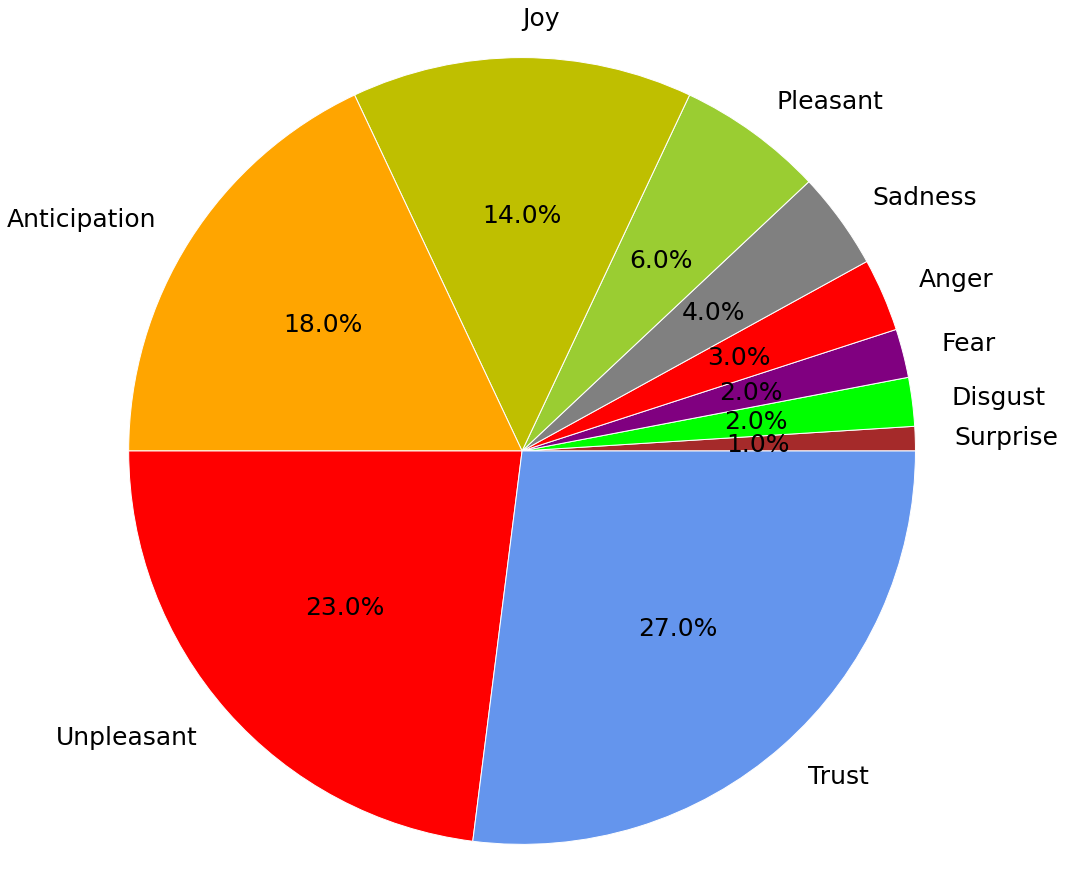

In [6]:
temp1=output_df.groupby(['emotions1'])['From'].count().reset_index()
temp1=temp1.sort_values('From')
t=temp1['From']
classes=temp1['emotions1']
    #plt.pie(result['spam_probability'],labels=classes)
fig2,ax=plt.subplots()
ax.pie(t, labels=classes,wedgeprops={'linewidth':1.0 ,'edgecolor':'white'},autopct='%1.1f%%',colors=['brown','lime','purple','r','grey','yellowgreen','y','orange','r','cornflowerblue','thistle'],textprops={'fontsize': 25})
ax.axis('equal')
#fig2.patch.set_linewidth(5)
#fig2.patch.set_edgecolor("black")
fig2.set_size_inches(15,16)
#fig1.tight_layout()
plt.show()

In [61]:
l=emotional(df)

C:\Users\SASING~1.BHA\AppData\Local\Temp/ipykernel_6320/3886865120.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['original_top_emotions']=y
C:\Users\SASING~1.BHA\AppData\Local\Temp/ipykernel_6320/3886865120.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Final']=l4


In [62]:
l[l['new_top_emotions']=='false']


,Text,raw_emotion_scores,stars,new_dict,affect_dict,top_emotions,new_top_emotions,original_top_emotions,Final
56,best gym in town!,{},5.0,{},{},"[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (t...",false,fear,positive
76,I am a member of the one that is being built i...,{},5.0,{},{},"[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (t...",false,fear,positive
93,They need more spin classes in the morning!,{},3.0,{},{},"[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (t...",false,fear,anticipation


In [63]:
type(l.new_top_emotions[56])

str

In [64]:
l.Final.value_counts()

negative         22
trust            19
anticipation     18
joy              12
positive         10
sadness           6
anger             5
fear              3
surprise          2
disgust           2
anticipation      1
Name: Final, dtype: int64

In [57]:
l['Final'].value_counts()

negative        23
trust           19
anticipation    18
joy             12
positive        10
sadness          6
anger            5
fear             3
surprise         2
disgust          2
Name: Final, dtype: int64

In [ ]:
l[l['Final']=='f']

In [47]:
l.to_csv(r'exp.csv')

In [32]:
x='best gym in town!'
y= 'I am a member of the one that is being built in las vegas and i wanted to see what they were like so i got a free pass from the vegas office to go in.  Place is amazing.  Clean and just has everything you would ever think of having at a gym'
NRCLex('Diksha Singhla is amazing').raw_emotion_scores

{}